In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
data = "C:/Users/ufabd/Desktop/ML stuff/mustidata"

In [9]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [10]:
train_data = train_datagen.flow_from_directory(
    os.path.join(data, "training_set"),
    target_size=(128, 128),
    class_mode='binary'
)

Found 240 images belonging to 2 classes.


In [11]:
test_data = test_datagen.flow_from_directory(
    os.path.join(data, "validation_set"),
    target_size=(128, 128),
    class_mode='binary'
)

Found 40 images belonging to 2 classes.


In [12]:
print(train_data.class_indices, test_data.class_indices)

{'no spill': 0, 'oil spill': 1} {'no spill': 0, 'oil spill': 1}


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(128, 128, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(128, 128, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 119072)            0         
                                                                 
 dense (Dense)               (None, 256)               30482688  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=4
)

In [21]:
history = model.fit(
    train_data,
    batch_size=16,
    epochs=10,
    validation_data=test_data,
    callbacks=[early_stopping]
)

Epoch 1/10
8/8 [==============================] - 6s 690ms/step - loss: 1.1595 - accuracy: 0.5375 - val_loss: 0.5953 - val_accuracy: 0.7250
Epoch 2/10
8/8 [==============================] - 5s 584ms/step - loss: 0.5822 - accuracy: 0.6833 - val_loss: 0.2850 - val_accuracy: 0.9000
Epoch 3/10
8/8 [==============================] - 5s 606ms/step - loss: 0.4021 - accuracy: 0.8083 - val_loss: 0.2003 - val_accuracy: 0.9500
Epoch 4/10
8/8 [==============================] - 5s 551ms/step - loss: 0.4600 - accuracy: 0.8167 - val_loss: 0.2109 - val_accuracy: 0.9000
Epoch 5/10
8/8 [==============================] - 5s 588ms/step - loss: 0.3954 - accuracy: 0.8333 - val_loss: 0.2472 - val_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 5s 681ms/step - loss: 0.2987 - accuracy: 0.9000 - val_loss: 0.1824 - val_accuracy: 0.9000
Epoch 7/10
8/8 [==============================] - 5s 660ms/step - loss: 0.2570 - accuracy: 0.9000 - val_loss: 0.1007 - val_accuracy: 0.9750
Epoch 8/10
8/8 [====

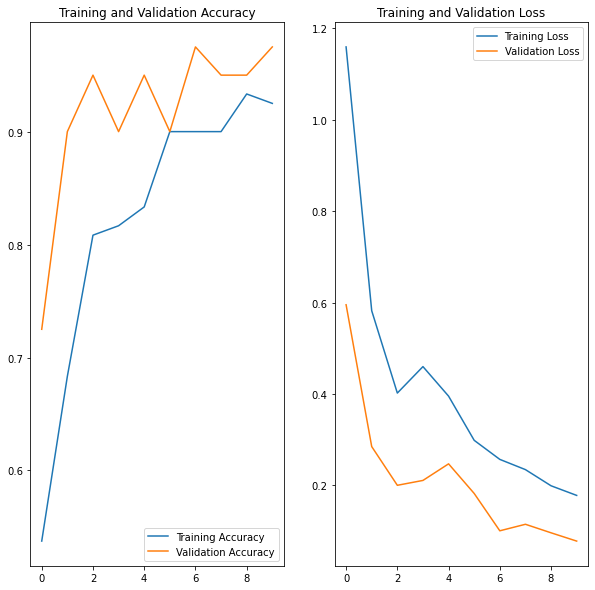

In [26]:
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

In [27]:
model_saved_path = os.path.join(data, 'saved_model', 'Oilspill_detection')
model.save(model_saved_path)

INFO:tensorflow:Assets written to: C:/Users/ufabd/Desktop/ML stuff/mustidata\saved_model\Oilspill_detection\assets
